# Problem Statement

* In this project, we are asked to classify the Gamma-Rays Bursts using Self organising Maps.
* The four key - parameters are identified,and we need to construct important features from them for the classification.(Reference of Paper is given)

In [1]:
# Importing required libraries

import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/grb-nasa-datasett1/browse_results.xls


In [2]:
# Importing Visualisation libraries

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# Conversion to excel path to CSV file
!pip install xlrd

excel_path = '/kaggle/input/grb-nasa-datasett1/browse_results.xls'

csv_path = '/kaggle/working/browse_results.csv'
df = pd.read_excel(excel_path, sheet_name='batsegrb')

df.to_csv(csv_path, index=False)
print(f'Converted {excel_path} to {csv_path}')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 3.2 MB/s eta 0:00:00
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
*** No CODEPAGE record, no encoding_override: will use 'iso-8859-1'
Converted /kaggle/input/grb-nasa-datasett1/browse_results.xls to /kaggle/working/browse_results.csv


In [4]:
df.head()

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.8037,0.104,0.240,7.801300e-09,2.304100e-08,1.007700e-07
2,0.6315,9.536,30.144,3.213700e-07,3.993300e-07,9.028400e-07
3,2.8020,1.728,8.384,3.528600e-07,2.814800e-07,3.213000e-07
4,0.3749,1.728,3.328,1.462900e-08,2.592300e-08,1.664800e-07


In [5]:
df.describe(include = 'all')

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3
count,2133.000000,2037.000000,2037.000000,2.133000e+03,2.133000e+03,2.133000e+03
mean,3.182687,16.206456,38.523956,8.232396e-07,1.051826e-06,3.365741e-06
std,7.651269,35.428086,66.298879,2.228232e-06,2.592166e-06,9.644787e-06
min,0.000000,0.006000,0.015000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.728000,0.774000,2.240000,3.837900e-08,5.360400e-08,1.868300e-07
50%,1.251000,6.080000,18.432000,2.548400e-07,3.078400e-07,7.492100e-07
75%,2.697000,17.472000,49.152000,8.274400e-07,9.773700e-07,2.447600e-06
max,181.634000,481.984000,1307.010000,4.607500e-05,4.591300e-05,1.391300e-04


Thus the given dataset contains only numerical variables and not any categorical variables.

## Univariate Analysis - Numerical Variables Only

In [6]:
df.select_dtypes(include = np.number)

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3
0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.8037,0.104,0.240,7.801300e-09,2.304100e-08,1.007700e-07
2,0.6315,9.536,30.144,3.213700e-07,3.993300e-07,9.028400e-07
3,2.8020,1.728,8.384,3.528600e-07,2.814800e-07,3.213000e-07
4,0.3749,1.728,3.328,1.462900e-08,2.592300e-08,1.664800e-07
...,...,...,...,...,...,...
2697,0.9680,0.034,0.078,3.441500e-09,9.727600e-09,4.809400e-08
2698,0.6430,0.168,0.344,1.415100e-09,1.088800e-09,4.833400e-08
2699,1.6840,25.472,109.824,6.943100e-07,1.848600e-06,7.657900e-06
2700,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Replacing inf and -inf values with NaN 

df = df.map(lambda x: np.nan if x in [np.inf, -np.inf] else x)

In [8]:
df.columns.size

6

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

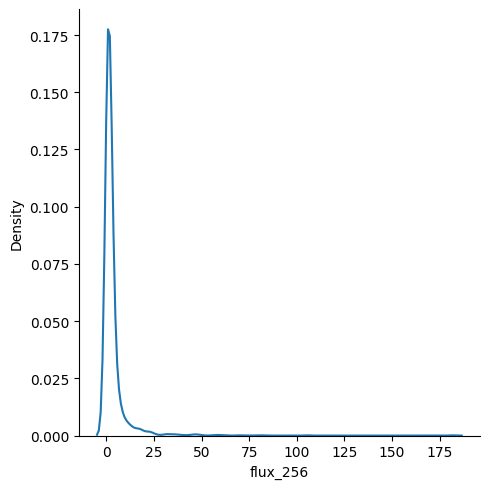

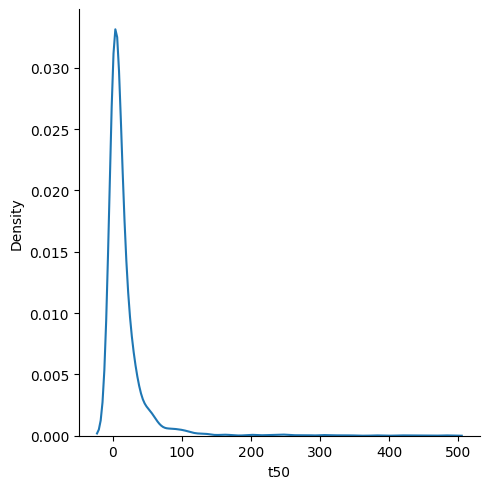

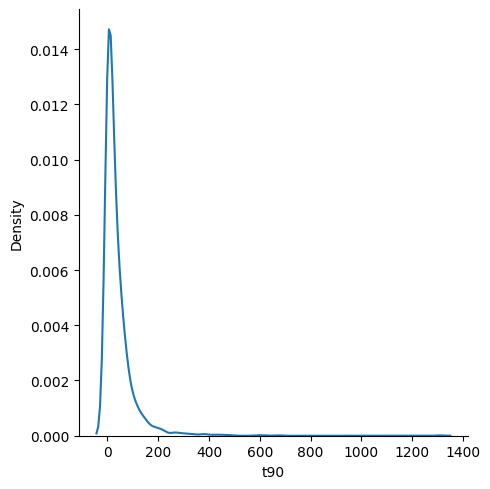

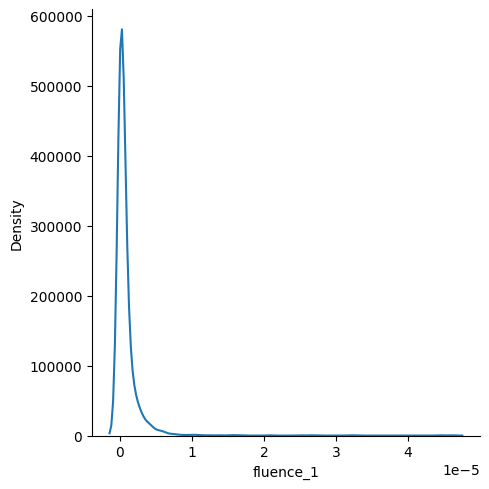

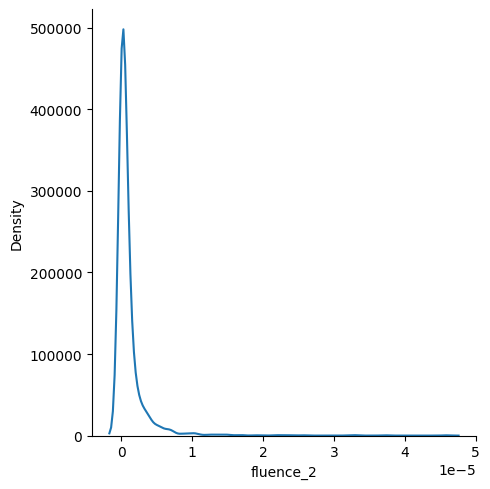

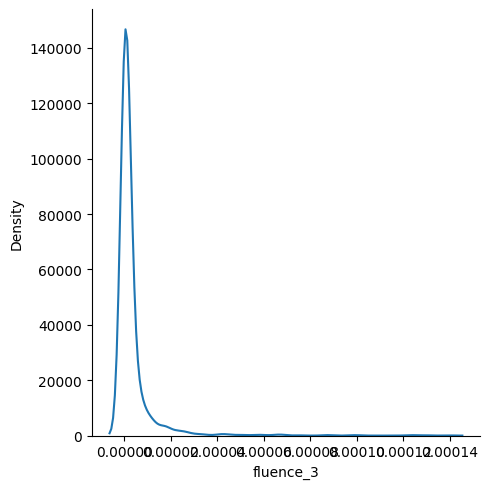

In [9]:
for i in range(df.columns.size):
    sns.displot(data = df, x = df.columns[i], kind = 'kde')

<Axes: >

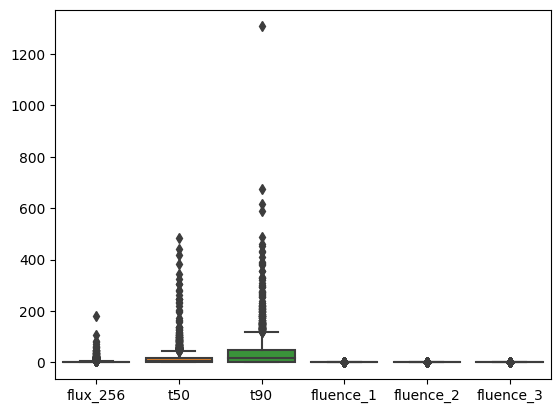

In [10]:
# Plotting the box plot of all the features

sns.boxplot(df)

## Bivariate Analysis - Numerical Variables Only

,flux_256,t50
flux_256,1.000000,-0.036674
t50,-0.036674,1.000000


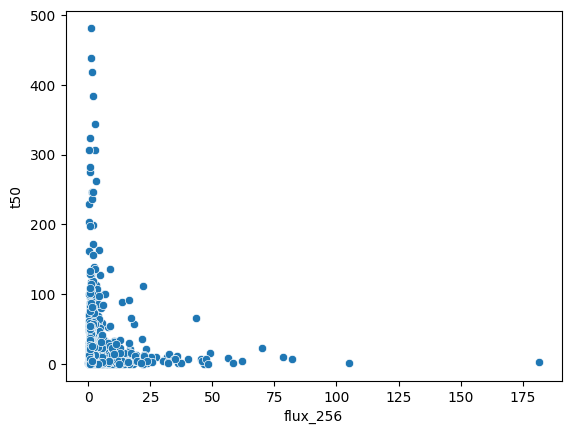

In [11]:
sns.scatterplot(data = df, x = 'flux_256',y = 't50')
df.loc[:,['flux_256','t50']].corr()

,flux_256,t90
flux_256,1.000,-0.006
t90,-0.006,1.000


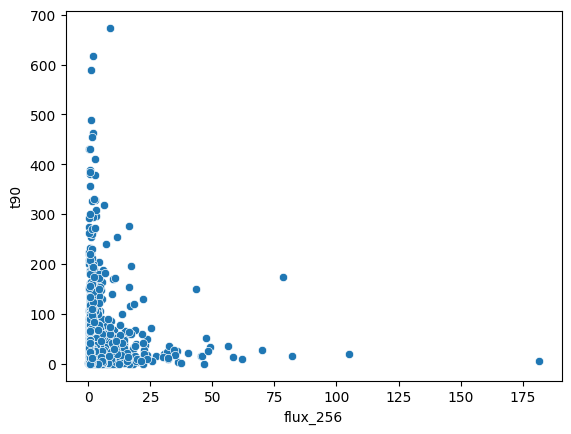

In [12]:
sns.scatterplot(data = df, x = 'flux_256',y = 't90')
df.loc[:,['flux_256','t90']].corr()

,flux_256,fluence_1
flux_256,1.000000,0.523193
fluence_1,0.523193,1.000000


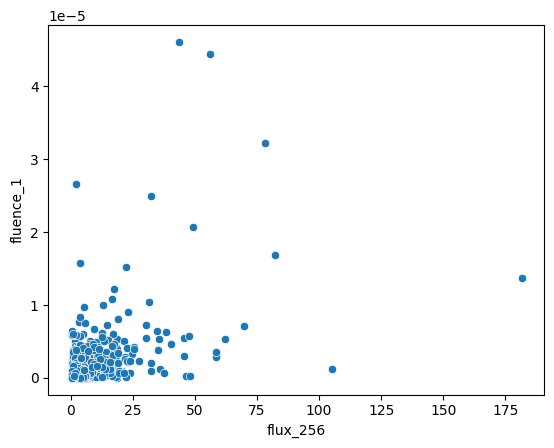

In [13]:
sns.scatterplot(data = df, x = 'flux_256',y = 'fluence_1')
df.loc[:,['flux_256','fluence_1']].corr()

,flux_256,fluence_2
flux_256,1.000000,0.577334
fluence_2,0.577334,1.000000


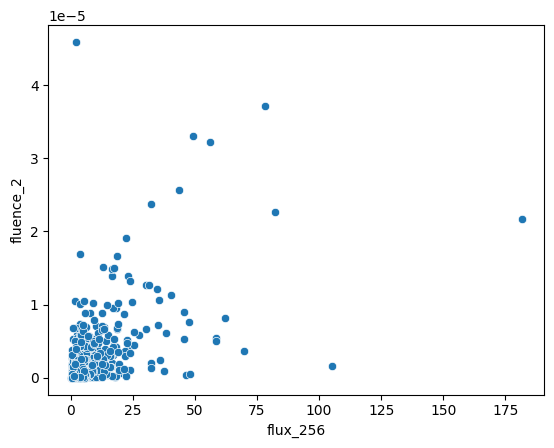

In [14]:
sns.scatterplot(data = df, x = 'flux_256',y = 'fluence_2')
df.loc[:,['flux_256','fluence_2']].corr()

,flux_256,fluence_3
flux_256,1.00000,0.59649
fluence_3,0.59649,1.00000


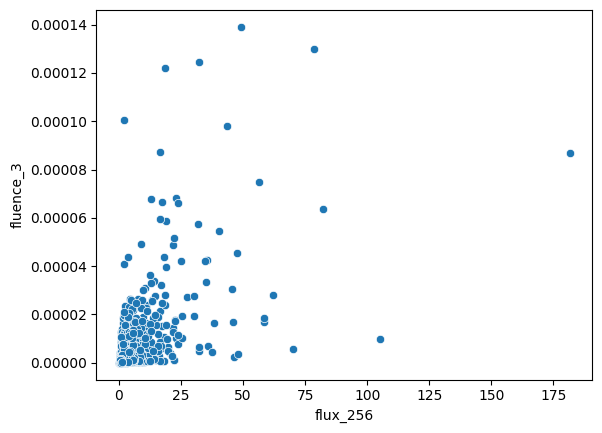

In [15]:
sns.scatterplot(data = df, x = 'flux_256',y = 'fluence_3')
df.loc[:,['flux_256','fluence_3']].corr()

,fluence_2,fluence_3
fluence_2,1.000000,0.936526
fluence_3,0.936526,1.000000


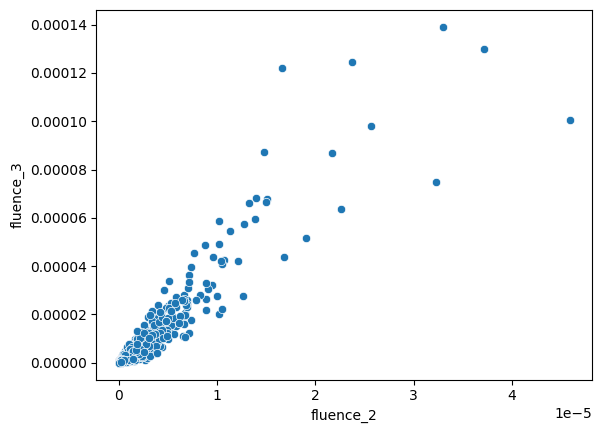

In [16]:
sns.scatterplot(data = df, x = 'fluence_2',y = 'fluence_3')
df.loc[:,['fluence_2','fluence_3']].corr()

In [17]:
# Correlation matrix
df.corr()

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3
flux_256,1.000000,-0.036674,-0.006000,0.523193,0.577334,0.596490
t50,-0.036674,1.000000,0.823171,0.157447,0.177875,0.138929
t90,-0.006000,0.823171,1.000000,0.247791,0.278764,0.227266
fluence_1,0.523193,0.157447,0.247791,1.000000,0.905141,0.809529
fluence_2,0.577334,0.177875,0.278764,0.905141,1.000000,0.936526
fluence_3,0.596490,0.138929,0.227266,0.809529,0.936526,1.000000


<Axes: >

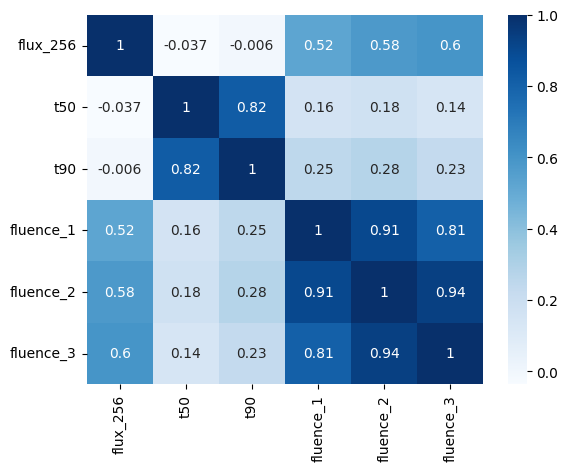

In [18]:
# Heatmap to visualise the correlation matrix
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1500x700 with 0 Axes>

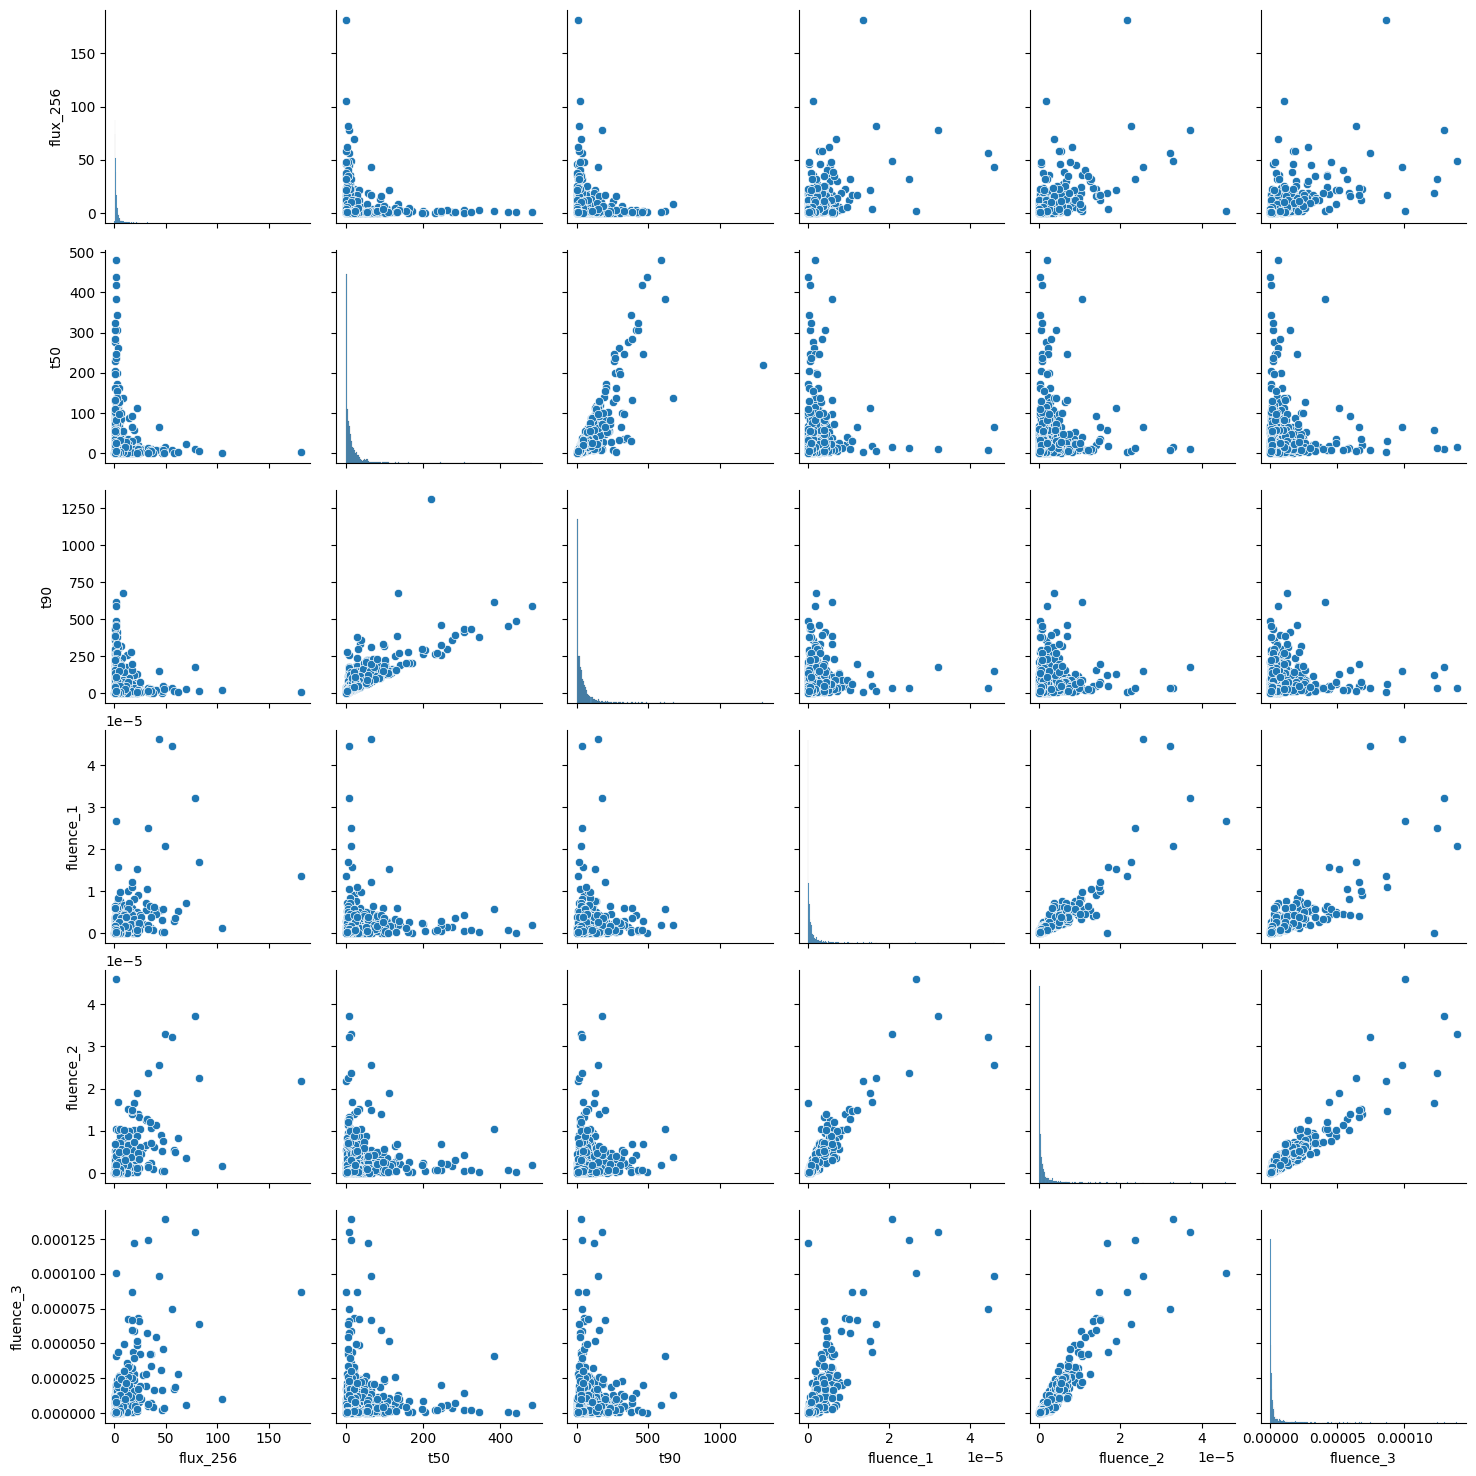

In [19]:
plt.figure(figsize = (15,7))
sns.pairplot(df)

### Inference - Univariate Analysis & Bivariate Analysis

* The data is positively skewed.
* It seems that there are many outliers, but we can't ignore as it may be crucial.
* No specific pattern is observed in bivariate analysis, however fluence 2 and 3 are highly correlated.

### Missing Values

In [20]:
df.isnull().sum()

flux_256     569
t50          665
t90          665
fluence_1    569
fluence_2    569
fluence_3    569
dtype: int64

* Here, we cannot drop any column as there are not much missing values(more than 60-70%) in a particular column.
* Also, dropping rows will lead to loss of information.

<Axes: >

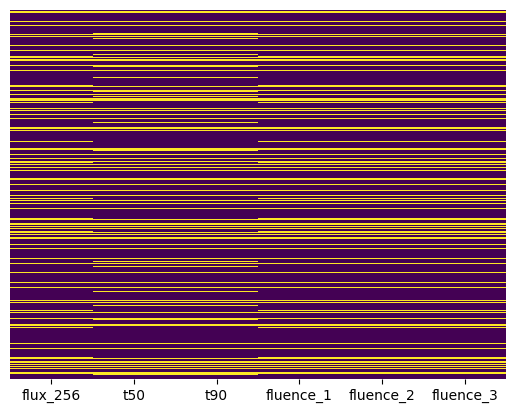

In [21]:
# Visulaising null values using heatmap
sns.heatmap(df.isnull(),yticklabels = False,cbar = False, cmap ='viridis')
# Line corresponds to the missing data

In [22]:
df.dtypes

flux_256     float64
t50          float64
t90          float64
fluence_1    float64
fluence_2    float64
fluence_3    float64
dtype: object

In [23]:
df.shape

(2702, 6)

* Now, we can replace the numeric variable with the mean/median.
* But using median would be better as outliers are present and mean gets affected by the extremes.

In [24]:
columns_to_fill = ['flux_256','t50', 't90', 'fluence_1', 'fluence_2', 'fluence_3']
df_new = df.copy()

for column in columns_to_fill:
    median = df_new[column].median()
    df_new.fillna({column:median}, inplace=True)

<Axes: >

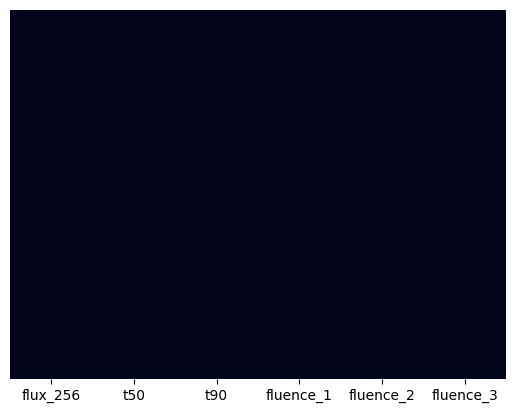

In [25]:
# After imputation of missing values with median

sns.heatmap(df_new.isnull(),yticklabels = False,cbar = False)

In [26]:
df_new.isnull().sum()

flux_256     0
t50          0
t90          0
fluence_1    0
fluence_2    0
fluence_3    0
dtype: int64

In [27]:
df_new.describe()

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3
count,2702.000000,2702.000000,2702.000000,2.702000e+03,2.702000e+03,2.702000e+03
mean,2.775903,13.714193,33.579045,7.035433e-07,8.951540e-07,2.814740e-06
std,6.843234,31.067001,58.208806,1.993189e-06,2.322899e-06,8.635056e-06
min,0.000000,0.006000,0.015000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.832075,1.890000,5.760000,7.321125e-08,1.048625e-07,3.013650e-07
50%,1.251000,6.080000,18.432000,2.548400e-07,3.078400e-07,7.492100e-07
75%,2.058000,12.160000,35.968000,6.018725e-07,7.100875e-07,1.723550e-06
max,181.634000,481.984000,1307.010000,4.607500e-05,4.591300e-05,1.391300e-04


In [28]:
# Filter out rows with inf and -inf values

df_new[(~df_new.isin([np.inf, -np.inf])).all(axis=1)]

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3
0,1.2510,6.080,18.432,2.548400e-07,3.078400e-07,7.492100e-07
1,1.8037,0.104,0.240,7.801300e-09,2.304100e-08,1.007700e-07
2,0.6315,9.536,30.144,3.213700e-07,3.993300e-07,9.028400e-07
3,2.8020,1.728,8.384,3.528600e-07,2.814800e-07,3.213000e-07
4,0.3749,1.728,3.328,1.462900e-08,2.592300e-08,1.664800e-07
...,...,...,...,...,...,...
2697,0.9680,0.034,0.078,3.441500e-09,9.727600e-09,4.809400e-08
2698,0.6430,0.168,0.344,1.415100e-09,1.088800e-09,4.833400e-08
2699,1.6840,25.472,109.824,6.943100e-07,1.848600e-06,7.657900e-06
2700,1.2510,6.080,18.432,2.548400e-07,3.078400e-07,7.492100e-07


In [29]:
df_new.describe()

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3
count,2702.000000,2702.000000,2702.000000,2.702000e+03,2.702000e+03,2.702000e+03
mean,2.775903,13.714193,33.579045,7.035433e-07,8.951540e-07,2.814740e-06
std,6.843234,31.067001,58.208806,1.993189e-06,2.322899e-06,8.635056e-06
min,0.000000,0.006000,0.015000,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.832075,1.890000,5.760000,7.321125e-08,1.048625e-07,3.013650e-07
50%,1.251000,6.080000,18.432000,2.548400e-07,3.078400e-07,7.492100e-07
75%,2.058000,12.160000,35.968000,6.018725e-07,7.100875e-07,1.723550e-06
max,181.634000,481.984000,1307.010000,4.607500e-05,4.591300e-05,1.391300e-04


## Feature Engineering

Hardness ratios HR32 (channel 3 fluence/channel 2 fluence)

HR 321 (channel 3 fluence divided by the sum of channel 2 fluence and channel 1 fluence)

$ HR321 = Fluence3/(Fluence 2 + Fluence 1) $

$ HR32 = Fluence3/(Fluence 2) $

In [30]:
row_list = []
for index,row in df_new.iterrows():
    for j in df.columns:
        if(row[j] == 0):
            row_list.append(index)
            break

In [31]:
df_new = df_new.drop(labels = row_list, axis = 0)
df_new

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3
0,1.2510,6.080,18.432,2.548400e-07,3.078400e-07,7.492100e-07
1,1.8037,0.104,0.240,7.801300e-09,2.304100e-08,1.007700e-07
2,0.6315,9.536,30.144,3.213700e-07,3.993300e-07,9.028400e-07
3,2.8020,1.728,8.384,3.528600e-07,2.814800e-07,3.213000e-07
4,0.3749,1.728,3.328,1.462900e-08,2.592300e-08,1.664800e-07
...,...,...,...,...,...,...
2697,0.9680,0.034,0.078,3.441500e-09,9.727600e-09,4.809400e-08
2698,0.6430,0.168,0.344,1.415100e-09,1.088800e-09,4.833400e-08
2699,1.6840,25.472,109.824,6.943100e-07,1.848600e-06,7.657900e-06
2700,1.2510,6.080,18.432,2.548400e-07,3.078400e-07,7.492100e-07


In [32]:
df_new.loc[:,'log S (S = fluence2+fluence3)'] = np.log(df_new.loc[:,'fluence_2'] + df_new.loc[:,'fluence_3'])
df_new.loc[:,'log t90'] = np.log(df_new.loc[:,'t90'])
df_new.loc[:,'log HR32'] = np.log(df_new.loc[:,'fluence_3']/(df_new.loc[:,'fluence_2']))
df_new.loc[:,'log HR321'] = np.log(df_new.loc[:,'fluence_3']/(df_new.loc[:,'fluence_2'] + df_new.loc[:,'fluence_1']))

In [33]:
df_new

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3,log S (S = fluence2+fluence3),log t90,log HR32,log HR321
0,1.2510,6.080,18.432,2.548400e-07,3.078400e-07,7.492100e-07,-13.760029,2.914088,0.889439,0.286308
1,1.8037,0.104,0.240,7.801300e-09,2.304100e-08,1.007700e-07,-15.904510,-1.427116,1.475565,1.183954
2,0.6315,9.536,30.144,3.213700e-07,3.993300e-07,9.028400e-07,-13.551478,3.405986,0.815757,0.225322
3,2.8020,1.728,8.384,3.528600e-07,2.814800e-07,3.213000e-07,-14.321714,2.126325,0.132314,-0.680210
4,0.3749,1.728,3.328,1.462900e-08,2.592300e-08,1.664800e-07,-15.463674,1.202372,1.859745,1.412290
...,...,...,...,...,...,...,...,...,...,...
2697,0.9680,0.034,0.078,3.441500e-09,9.727600e-09,4.809400e-08,-16.665903,-2.551046,1.598190,1.295284
2698,0.6430,0.168,0.344,1.415100e-09,1.088800e-09,4.833400e-08,-16.822854,-1.067114,3.793059,2.960286
2699,1.6840,25.472,109.824,6.943100e-07,1.848600e-06,7.657900e-06,-11.563535,4.698879,1.421309,1.102429
2700,1.2510,6.080,18.432,2.548400e-07,3.078400e-07,7.492100e-07,-13.760029,2.914088,0.889439,0.286308


In [34]:
df_new.head()

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3,log S (S = fluence2+fluence3),log t90,log HR32,log HR321
0,1.2510,6.080,18.432,2.548400e-07,3.078400e-07,7.492100e-07,-13.760029,2.914088,0.889439,0.286308
1,1.8037,0.104,0.240,7.801300e-09,2.304100e-08,1.007700e-07,-15.904510,-1.427116,1.475565,1.183954
2,0.6315,9.536,30.144,3.213700e-07,3.993300e-07,9.028400e-07,-13.551478,3.405986,0.815757,0.225322
3,2.8020,1.728,8.384,3.528600e-07,2.814800e-07,3.213000e-07,-14.321714,2.126325,0.132314,-0.680210
4,0.3749,1.728,3.328,1.462900e-08,2.592300e-08,1.664800e-07,-15.463674,1.202372,1.859745,1.412290


In [35]:
df_new.describe()

,flux_256,t50,t90,fluence_1,fluence_2,fluence_3,log S (S = fluence2+fluence3),log t90,log HR32,log HR321
count,2651.000000,2651.000000,2651.000000,2.651000e+03,2.651000e+03,2.651000e+03,2651.000000,2651.000000,2651.000000,2651.000000
mean,2.809310,13.883255,34.033659,7.163990e-07,9.057065e-07,2.820678e-06,-13.761628,2.481948,1.060907,0.473648
std,6.895746,31.294470,58.598431,2.010045e-06,2.321990e-06,8.395761e-06,1.553965,1.838108,0.598320,0.677855
min,0.271000,0.006000,0.015000,3.527500e-10,1.088800e-09,9.913100e-10,-18.147864,-4.199705,-2.814026,-3.775679
25%,0.856350,2.112000,6.496000,8.702250e-08,1.146300e-07,3.274300e-07,-14.606613,1.871174,0.809198,0.204577
50%,1.251000,6.080000,18.432000,2.548400e-07,3.078400e-07,7.492100e-07,-13.760029,2.914088,0.889439,0.295311
75%,2.097600,12.320000,36.560000,6.211250e-07,7.226750e-07,1.773550e-06,-12.885729,3.598954,1.379638,0.875743
max,181.634000,481.984000,1307.010000,4.607500e-05,4.591300e-05,1.391300e-04,-8.667179,7.175497,3.923899,2.960286


## Transformation for skewed data(Normalisation)

In [36]:
# df.columns
df_new.drop(columns = df.columns,inplace = True)

In [37]:
df_new

,log S (S = fluence2+fluence3),log t90,log HR32,log HR321
0,-13.760029,2.914088,0.889439,0.286308
1,-15.904510,-1.427116,1.475565,1.183954
2,-13.551478,3.405986,0.815757,0.225322
3,-14.321714,2.126325,0.132314,-0.680210
4,-15.463674,1.202372,1.859745,1.412290
...,...,...,...,...
2697,-16.665903,-2.551046,1.598190,1.295284
2698,-16.822854,-1.067114,3.793059,2.960286
2699,-11.563535,4.698879,1.421309,1.102429
2700,-13.760029,2.914088,0.889439,0.286308


In [38]:
# Statistical transformation as the data is highly positively skewed

from scipy.stats import skew
skewness = skew(df_new)
X = skew(df_new)
X

array([ 0.03397462, -1.04102587,  0.24006186, -0.20000898])

In [39]:
df_new

,log S (S = fluence2+fluence3),log t90,log HR32,log HR321
0,-13.760029,2.914088,0.889439,0.286308
1,-15.904510,-1.427116,1.475565,1.183954
2,-13.551478,3.405986,0.815757,0.225322
3,-14.321714,2.126325,0.132314,-0.680210
4,-15.463674,1.202372,1.859745,1.412290
...,...,...,...,...
2697,-16.665903,-2.551046,1.598190,1.295284
2698,-16.822854,-1.067114,3.793059,2.960286
2699,-11.563535,4.698879,1.421309,1.102429
2700,-13.760029,2.914088,0.889439,0.286308


* log t90 and log HR32 will be transformed as other 2 are quite normalised as clear from the skew values.

In [40]:
from sklearn.preprocessing import PowerTransformer
pt= PowerTransformer(method='yeo-johnson')

features_to_transform = ['log t90', 'log HR32']
df_new[features_to_transform] = pt.fit_transform(df_new[features_to_transform])

In [41]:
# Checking if the data has now been normalized

skewness = skew(df_new)
X1 = skew(df_new)
X1

array([ 0.03397462, -0.24280556,  0.17114747, -0.20000898])

In [42]:
df_new.describe()

,log S (S = fluence2+fluence3),log t90,log HR32,log HR321
count,2651.000000,2.651000e+03,2.651000e+03,2651.000000
mean,-13.761628,8.040846e-17,-7.236761e-17,0.473648
std,1.553965,1.000189e+00,1.000189e+00,0.677855
min,-18.147864,-2.331187e+00,-6.736863e+00,-3.775679
25%,-14.606613,-5.473797e-01,-4.161318e-01,0.204577
50%,-13.760029,1.160051e-01,-2.816614e-01,0.295311
75%,-12.885729,6.039509e-01,5.358848e-01,0.875743
max,-8.667179,3.711766e+00,4.705086e+00,2.960286


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

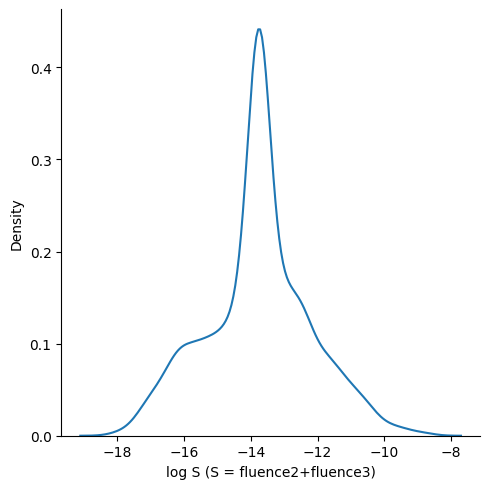

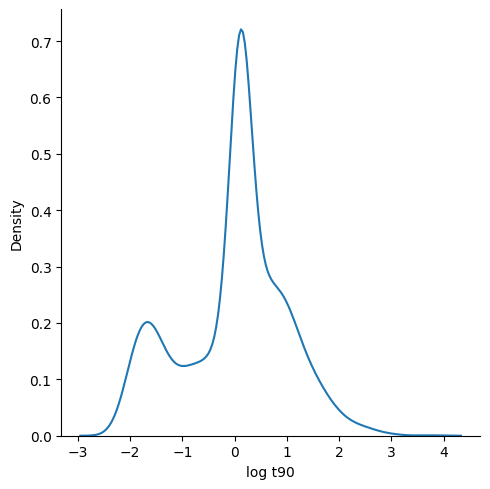

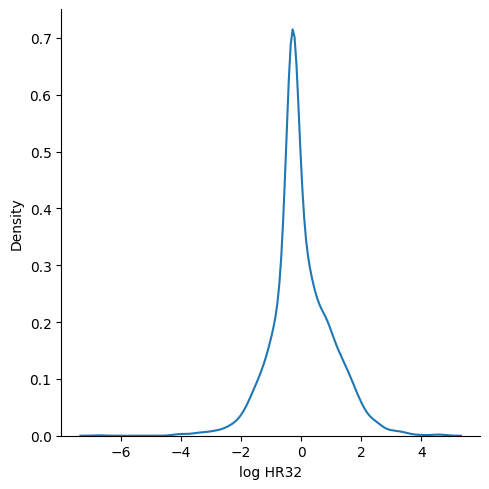

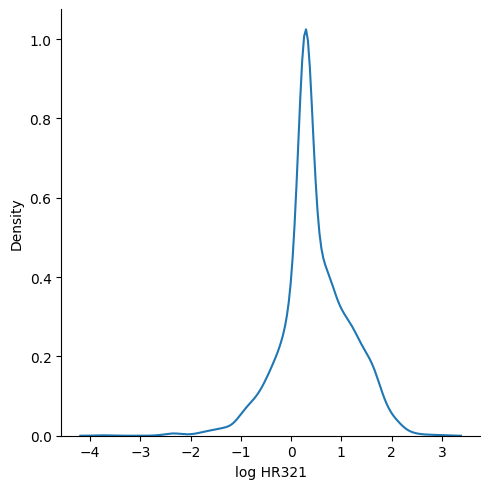

In [43]:
for i in range(df_new.columns.size):
    sns.displot(data = df_new, x = df_new.columns[i], kind = 'kde')

# Training the Model --> Self-Organising Map

Self-Organizing Maps (SOM) are a type of artificial neural network that is trained using unsupervised learning to produce a low-dimensional, discretized representation of the input space of the training samples, called a map. They are useful for visualizing high-dimensional data.

It is basically used for dimensional reduction. The SOM is not merely a clustering technique:it can also be used to visualize the input data set,since it attempts to represent the topological ordering of the input data in the ordering of the map unit reference vectors.

As we know GRBs can be classified into Long-soft and short-hard classes which has been identified by the help of BATSE-NASA catalog using the burst duration parameter T90 (the time it takes for 90% of the total burst flux to arrive).

It has been noted that there is a dividing line around T90 ~ 2s.
* T90 > 2s --> Long GRBs
* T90 < 2s --> ShortGRBs

However, this cannot be the one - and only way to classify, hence we'll be applying SOM on the dataset and know about the relevamt features from the manuscript attached.

In [44]:
# Importing SOM and required libraries

!pip install minisom
from minisom import MiniSom

  Preparing metadata (setup.py) ... - \ done
  Created wheel for minisom: filename=MiniSom-2.3.2-py3-none-any.whl size=10650 sha256=cfb4ead9438074617d12874189b55976c2bf956b895ef3fe5e12467e24f6be37
  Stored in directory: /root/.cache/pip/wheels/b4/f6/8a/9daf8831901c3e3805775633404248f10663d1c80b7e5a1314
Successfully built minisom


In [45]:
df_new.describe()

,log S (S = fluence2+fluence3),log t90,log HR32,log HR321
count,2651.000000,2.651000e+03,2.651000e+03,2651.000000
mean,-13.761628,8.040846e-17,-7.236761e-17,0.473648
std,1.553965,1.000189e+00,1.000189e+00,0.677855
min,-18.147864,-2.331187e+00,-6.736863e+00,-3.775679
25%,-14.606613,-5.473797e-01,-4.161318e-01,0.204577
50%,-13.760029,1.160051e-01,-2.816614e-01,0.295311
75%,-12.885729,6.039509e-01,5.358848e-01,0.875743
max,-8.667179,3.711766e+00,4.705086e+00,2.960286


In [46]:
# Checking for NaN values
print("Checking for NaN values:")
# if any NaN values are present
print(df_new.isna().any())  
# Count of NaN values
print(df_new.isna().sum())

# Checking for infinite values
print("\nChecking for infinite values:")
# if any infinite values are present
print(df_new.isin([np.inf, -np.inf]).any())  
# Count of NaN values
print(df_new.isin([np.inf, -np.inf]).sum())  

Checking for NaN values:
log S (S = fluence2+fluence3)    False
log t90                          False
log HR32                         False
log HR321                        False
dtype: bool
log S (S = fluence2+fluence3)    0
log t90                          0
log HR32                         0
log HR321                        0
dtype: int64

Checking for infinite values:
log S (S = fluence2+fluence3)    False
log t90                          False
log HR32                         False
log HR321                        False
dtype: bool
log S (S = fluence2+fluence3)    0
log t90                          0
log HR32                         0
log HR321                        0
dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

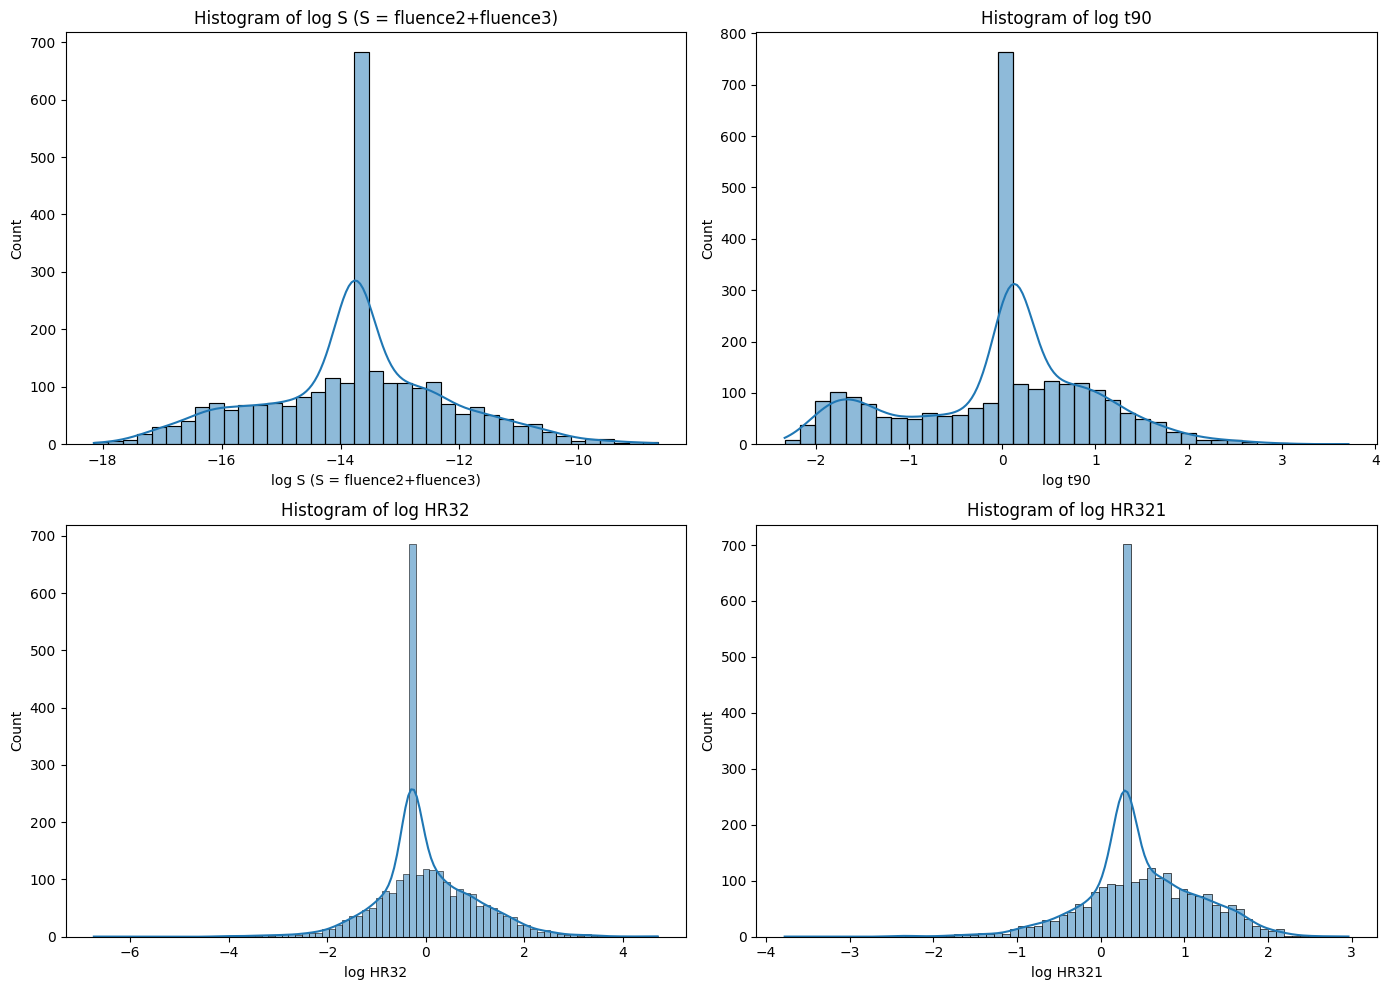

In [47]:
# Features to plot
features = ['log S (S = fluence2+fluence3)','log t90','log HR32','log HR321']

# Histogram
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.histplot(df_new[feature], kde=True)
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

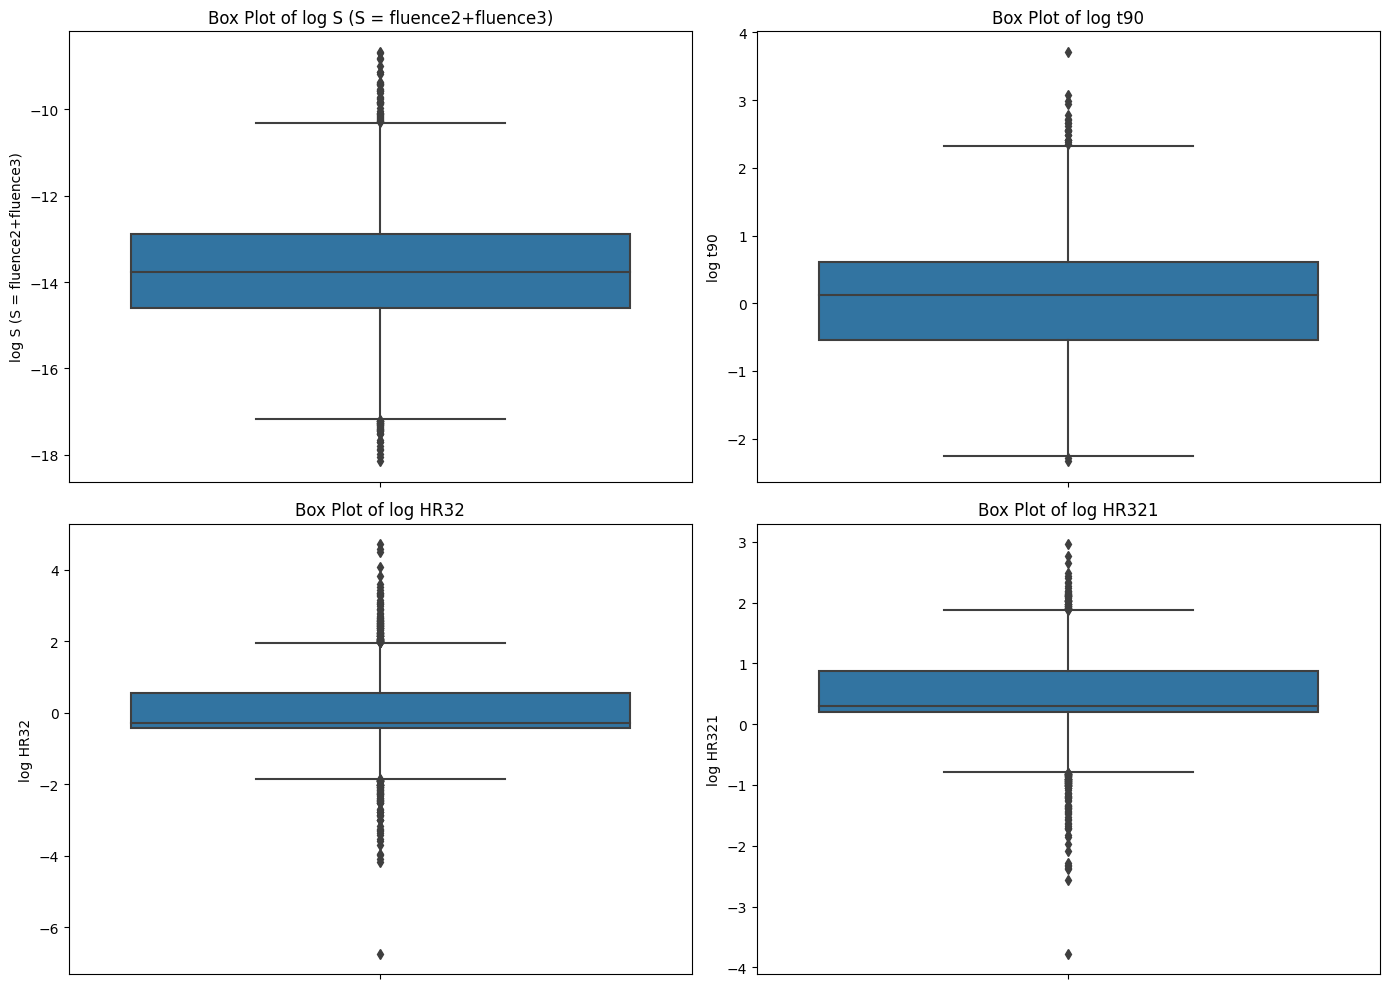

In [48]:
# Box Plot
plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_new[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

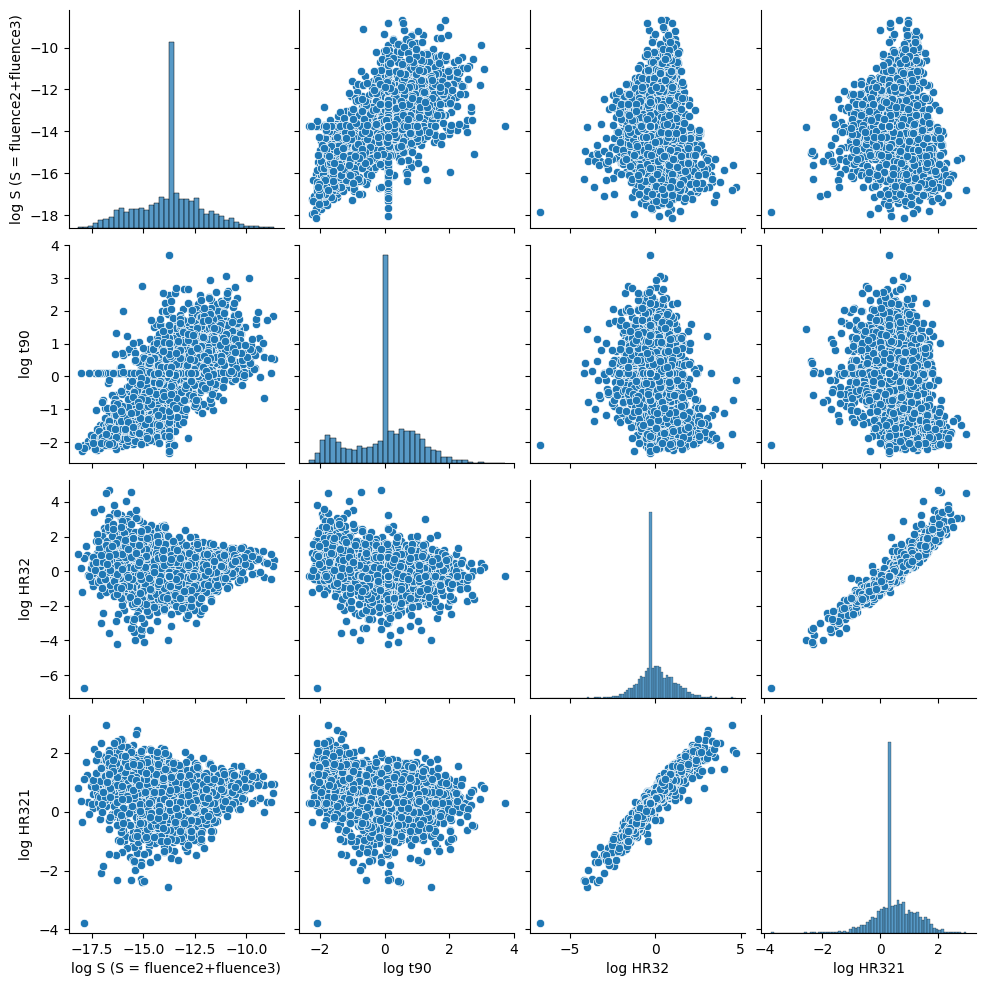

In [49]:
# Pair Plot (Seaborn)
sns.pairplot(df_new[features])
plt.show()

In [50]:
# MiniSom expects input in numpy array, so we will not convert X to pandas dataframe

X = df_new.to_numpy()
type(X)
print(X.shape)
print(X)

(2651, 4)
[[-13.76002855   0.11600514  -0.28166142   0.28630824]
 [-15.90450963  -1.82763215   0.69515998   1.18395357]
 [-13.55147845   0.46254143  -0.40513159   0.22532239]
 ...
 [-11.56353478   1.46514102   0.6051007    1.1024287 ]
 [-13.76002855   0.11600514  -0.28166142   0.28630824]
 [-14.26295458  -0.20988988  -0.5400163    0.01739052]]


In [51]:
df_new.shape[0]

2651

In [52]:
df_new.shape[1]

4

# Initialising A Self Organising Map(SOM)

* A rule of thumb to set the size of the grid for a dimensionality reduction task is that it should contain 5 * sqrt(N) neurons. where N = df_new.shape[0] = 2651(here) is the number of samples in the dataset to analyze.

* E.g. if dataset has 2651 samples, 5 * sqrt(2651) = 257.44 hence a map 16-by-16 should perform well.


In [53]:
som = MiniSom(x=16,y=16,input_len = df_new.shape[1], sigma = 1.0,learning_rate = 0.5,
            neighborhood_function='gaussian',topology='hexagonal', 
            activation_distance='euclidean', random_seed=45)

# Initialising Random Weights
som.random_weights_init(X)

def train_som(som, data, num_epochs):
    for epoch in range(num_epochs):
        som.train_random(data, 1)
        print(f'Epoch {epoch + 1}/{num_epochs}')

# Training the SOM
train_som(som, X, 1000)

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

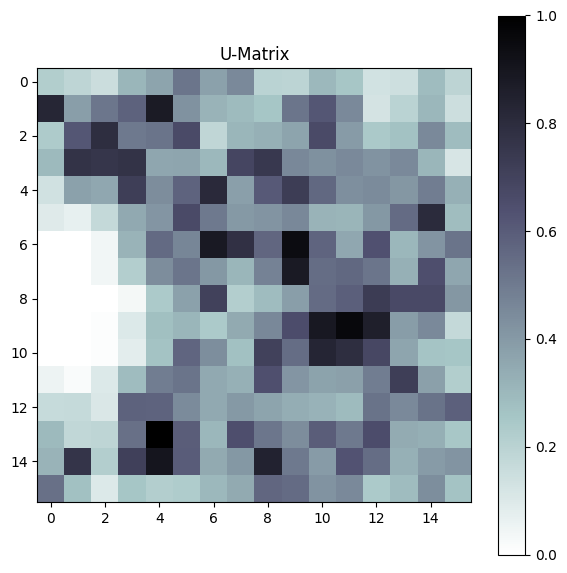

In [54]:
# Visualizing the results
u_matrix = som.distance_map().T

# Plot the U-matrix
plt.figure(figsize=(7, 7))
plt.imshow(u_matrix, cmap='bone_r', interpolation='nearest')
plt.colorbar()
plt.title('U-Matrix')
plt.show()

In [55]:
som.get_weights().shape

(16, 16, 4)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


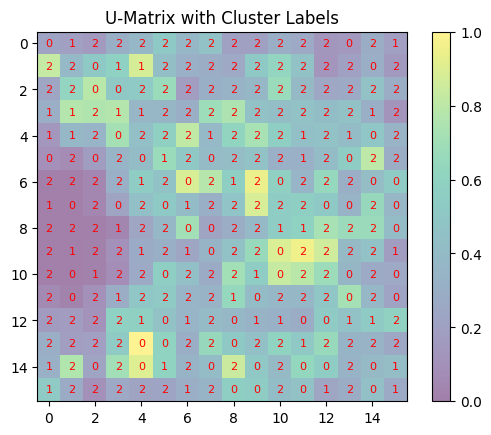

In [56]:
from sklearn.cluster import KMeans

# Extract the weights of the neurons
weights = som.get_weights().reshape(256, 4)

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(weights)

# Reshaping cluster labels to match the SOM grid
cluster_labels = clusters.reshape(16, 16)

plt.imshow(u_matrix, cmap='viridis', alpha=0.5)
plt.colorbar()

for i in range(16):
    for j in range(16):
        plt.text(j, i, str(cluster_labels[i, j]), ha='center', va='center', color='red', fontsize=8)

plt.title('U-Matrix with Cluster Labels')
plt.show()

## Conclusion

* Thus, we have classified the GRBs into three categories depending on the features(S tot, log T90, log HR321, log HR32).
* These classes can be identified as 0,1,2.
* Hence, we used SOM, an unsupervised leaerning technique to classify GRBs.